In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Fashion MNIST dataset 임포트
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# train 데이터 dataset 확인 
print(train_images[0])

'''0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot'''
print(train_labels[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


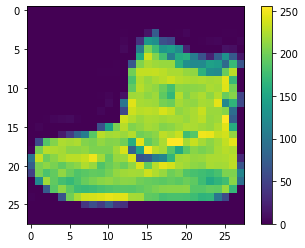

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# 데이터 전처리
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#훈련
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4755 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3581 - accuracy: 0.8678
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3233 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2993 - accuracy: 0.8890
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2824 - accuracy: 0.8956


In [ ]:
# 정확도 평가
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8798
0.34162113070487976 0.879800021648407


In [ ]:
# 예측
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

[4.73284381e-08 2.40981707e-10 1.33815155e-08 2.32333286e-09
 6.18811358e-09 1.11744460e-02 8.19445205e-08 1.39109287e-02
 1.00725697e-06 9.74913359e-01]
9


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # tf.keras.layers.Dense(128, activation='relu'),      ## CASE 1
    # tf.keras.layers.Dense(512, activation='relu'),    ## CASE 2
    tf.keras.layers.Dense(1024, activation='relu'),   ## CASE 3(정확도가 가장 높은 것으로 선택)
    tf.keras.layers.Dense(10, activation='softmax')
])